In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 사용한 데이터

In [3]:
data=pd.read_csv('지진정보.csv',encoding='ANSI')
data

,시간,규모,위도,경도,위치
0,2000-01-18 15:08,3.0,38.70,127.90,북한 강원 회양 동쪽 26km 지역
1,2000-02-21 1:06,2.1,35.80,128.20,경북 고령군 북서쪽 10km 지역
2,2000-03-15 1:10,2.5,36.30,125.90,전북 군산시 어청도 북북서쪽 20km 해역
3,2000-03-21 13:43,2.3,36.50,126.00,충남 태안군 남서쪽 38km 해역
4,2000-04-12 4:44,3.5,36.90,125.30,충남 태안군 서격렬비열도 북북서쪽 39km 해역
...,...,...,...,...,...
1401,2020-11-17 3:10,2.6,41.28,129.18,북한 함경북도 길주 북북서쪽 38km 지역
1402,2020-11-19 23:17,3.1,37.99,125.37,북한 황해남도 옹진 북쪽 7km 지역
1403,2020-12-15 17:15,2.3,37.70,125.17,북한 황해남도 옹진 남남서쪽 31km 해역
1404,2020-12-18 17:17,2.7,37.66,129.32,강원 동해시 북동쪽 24km 해역


In [4]:
rain=pd.read_csv('전국강수량.csv',encoding='ANSI')
rain

,날짜,강수량(mm)
0,2000-01-01,1.7
1,2000-01-02,2.5
2,2000-01-03,0.0
3,2000-01-04,0.0
4,2000-01-05,9.1
...,...,...
7666,2020-12-27,2.2
7667,2020-12-28,0.1
7668,2020-12-29,1.8
7669,2020-12-30,1.2


# 가설 1.
> 계절별로 지역과 해역에서의 주기성이 있을 것이다.

# 가설2.
> 지진활동의 증가는 강수량과 상관관계가 있을 것이다.

# 데이터 정리

In [5]:
a=[]
for i in range(len(data.위치)):
    a.append(data.위치[i][-2:])
data['지역/해역']=a

b=[]
for i in range(len(data.시간)):
    b.append(data.시간[i][:10])
data['날짜']=b

In [6]:
year=[]
for i in range(len(data.날짜)):
    year.append(data.날짜[i][2:4])
data['year']=year

month=[]
for i in range(len(data.날짜)):
    month.append(int(data.날짜[i][5:7]))
data['month']=month

In [7]:
data['진도']=['격진' if s >=7 else ('열진' if s>=6 else ('강진' if s>=5 else ('중진' if s>=4 else('약진' if s>=3 else('경진' if s>=2 else ('미진' if s>=1 else '무감'))))))for s in data['규모']]

data['season']=['winter' if s >=10 else ('fall' if s>=7 else ('summer' if s>=4 else 'spring'))for s in data['month']]

In [8]:
del data['시간']

In [9]:
data

,규모,위도,경도,위치,지역/해역,날짜,year,month,진도,season
0,3.0,38.70,127.90,북한 강원 회양 동쪽 26km 지역,지역,2000-01-18,00,1,약진,spring
1,2.1,35.80,128.20,경북 고령군 북서쪽 10km 지역,지역,2000-02-21,00,2,경진,spring
2,2.5,36.30,125.90,전북 군산시 어청도 북북서쪽 20km 해역,해역,2000-03-15,00,3,경진,spring
3,2.3,36.50,126.00,충남 태안군 남서쪽 38km 해역,해역,2000-03-21,00,3,경진,spring
4,3.5,36.90,125.30,충남 태안군 서격렬비열도 북북서쪽 39km 해역,해역,2000-04-12,00,4,약진,summer
...,...,...,...,...,...,...,...,...,...,...
1401,2.6,41.28,129.18,북한 함경북도 길주 북북서쪽 38km 지역,지역,2020-11-17,20,11,경진,winter
1402,3.1,37.99,125.37,북한 황해남도 옹진 북쪽 7km 지역,지역,2020-11-19,20,11,약진,winter
1403,2.3,37.70,125.17,북한 황해남도 옹진 남남서쪽 31km 해역,해역,2020-12-15,20,12,경진,winter
1404,2.7,37.66,129.32,강원 동해시 북동쪽 24km 해역,해역,2020-12-18,20,12,경진,winter


# 연도별 지진 발생 빈도

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

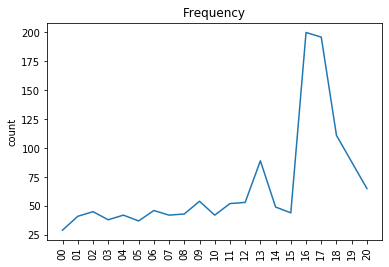

In [10]:
F=data['year'].value_counts(sort=False)
F=F.reindex(index=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20'])
plt.plot(F)
plt.title('Frequency')
plt.ylabel('count')
plt.xticks(rotation=90)

# 지역과 해역의 계절별 지진 현상

In [11]:
land=data[data['지역/해역']=='지역']
ocean=data[data['지역/해역']=='해역']

l=land['season'].value_counts(sort=False)
o=ocean['season'].value_counts(sort=False)

l=l.reindex(index=['spring','summer','fall','winter'])
o=o.reindex(index=['spring','summer','fall','winter'])

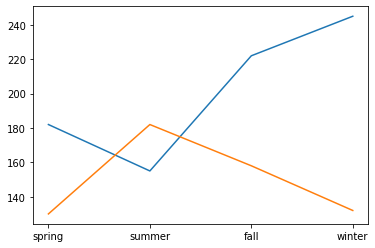

In [12]:
p1=plt.plot(l)
p2=plt.plot(o)

# 연도별 평균 강수량 비교

In [13]:
year2=[]
for i in range(len(rain.날짜)):
    year2.append(rain.날짜[i][2:4])
rain['year']=year2

month2=[]
for i in range(len(rain.날짜)):
    month2.append(int(rain.날짜[i][5:7]))
rain['month']=month2

rain['season']=['winter' if s >=10 else ('fall' if s>=7 else ('summer' if s>=4 else 'spring'))for s in rain['month']]

In [14]:
rain

,날짜,강수량(mm),year,month,season
0,2000-01-01,1.7,00,1,spring
1,2000-01-02,2.5,00,1,spring
2,2000-01-03,0.0,00,1,spring
3,2000-01-04,0.0,00,1,spring
4,2000-01-05,9.1,00,1,spring
...,...,...,...,...,...
7666,2020-12-27,2.2,20,12,winter
7667,2020-12-28,0.1,20,12,winter
7668,2020-12-29,1.8,20,12,winter
7669,2020-12-30,1.2,20,12,winter


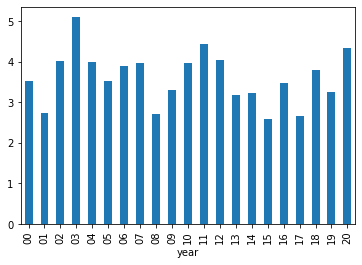

In [15]:
rain.groupby('year')['강수량(mm)'].mean().plot(kind='bar')

# 강수량과 지진발생 빈도의 관계

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)


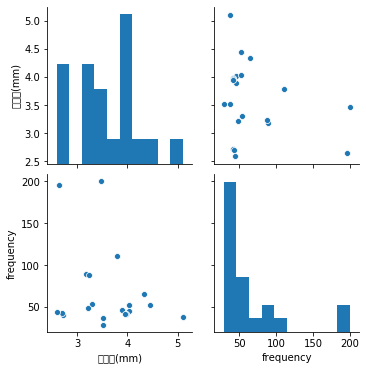

In [16]:
p=DataFrame(rain.groupby('year')['강수량(mm)'].mean())
p['frequency']=F
sns.pairplot(p)

In [17]:
p.corr(method='spearman')

,강수량(mm),frequency
강수량(mm),1.000000,-0.182055
frequency,-0.182055,1.000000


# 연속적으로 발생한 지진과 강수량의 관계

In [28]:
rm=DataFrame(data2.groupby(['year','month'])['강수량(mm)'].mean())
h=DataFrame(data.groupby('year')['month'].value_counts(sort=False))
rm['continue']=h[h['month']>=10]
rm.dropna(axis=0)

강수량(mm)  continue
year month                     
06   4       5.457143      11.0
11   6       8.740625      10.0
13   5       4.056757      12.0
     6       3.441667      19.0
     7      10.067647      12.0
     8       4.932353      11.0
16   9       5.285849      91.0
     10      4.738235      18.0
     11      1.032432      21.0
     12      1.783784      21.0
17   1       0.466667      14.0
     2       0.964706      16.0
     3       0.708108      18.0
     4       1.908333      17.0
     5       0.958333      13.0
     6       1.990323      10.0
     10      1.982353      12.0
     11      0.282353      53.0
     12      0.584211      23.0
18   2       0.878049      27.0
     11      1.524242      11.0
19   6       4.754286      11.0

C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)


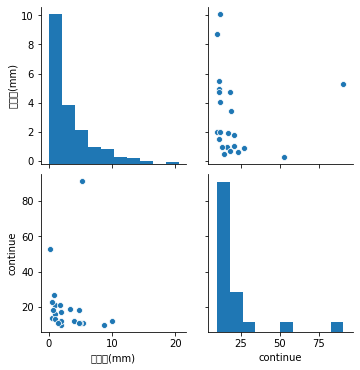

In [40]:
sns.pairplot(rm)

# 결론
> 1. 계절별로 주기성은 있다. 해역에서는 여름에 지진이 자주 발생하고, 지역에서는 가을과 겨울에 지진이 자주 발생하는 경향이 있다. 

> 2. 강수량과 지진빈도에는 상관관계가 없는 것 같다. 